# Messtechnik HS2021 - Tutorial 4

## Aufgabe 1: Diskrete Fourier Transformation und Datenverarbeitung
---------
Ein Kohlenstoff NMR Signal ($^{13}{\rm C}$) wurde aufgenommen und mit einer Abtastrate von 15 kHz digitalisiert. Das komplexwertige FID wurde durch ein MATLAB Program digitalisiert, exportiert und ist in `fid.mat` zu finden.

---------

### 1a)
Generieren Sie aus dem komplexwertigen FID das dazugehörige Spektrum und plotten Sie dessen Realteil mit der korrekten Frequenzachse in kHz.

*Hinweis:* Um MATLAB Dateien in Python zu importieren, kann man die ``scipy.io.loadmat`` Funktion brauchen:

````
from scipy.io import loadmat 
data = loadmat('fid.mat')
fid = data['fid']
fid = np.squeeze(fid) 
````

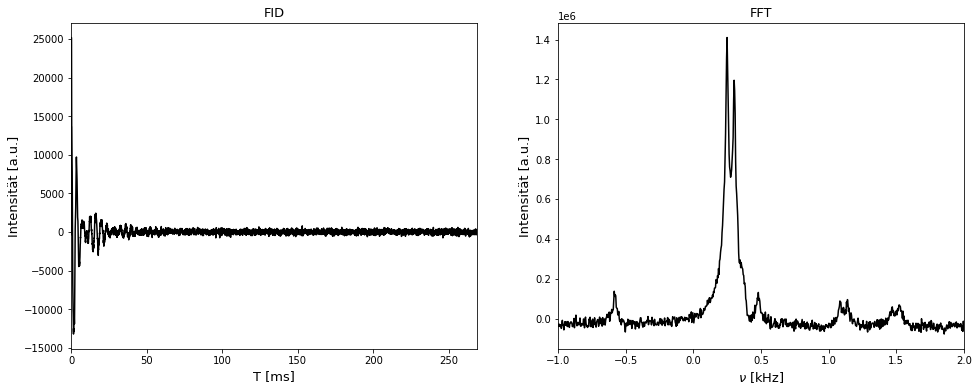

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.io import loadmat 
from numpy.fft import fft, fftshift, fftfreq

# Importieren der MATLAB Daten
data = loadmat('fid.mat')
fid = data['fid']
fid = np.squeeze(fid)

# Abtastrate und Parameter
fs = 15   # kHz
dt = 1/fs # ms
N = len(fid)

# Erstellen der Zeitachse
tmax = N*dt
t = np.linspace(0,tmax,N) #ms

# Frequenzachse
frq = fftfreq(N,d=dt) # kHz
frq = fftshift(frq)   # kHz

# Spektrum
spc = fftshift(fft(fid))

# Plot
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(t,np.real(fid),'k')
plt.xlim((0,np.amax(t)))
plt.xlabel('T [ms]',fontsize=13)
plt.ylabel('Intensität [a.u.]',fontsize=13)
plt.title('FID',fontsize=13)

plt.subplot(122)
plt.plot(frq,np.real(spc),'k')
plt.xlim((-1,2))
plt.xlabel('$\\nu$ [kHz]',fontsize=13)
plt.ylabel('Intensität [a.u.]',fontsize=13)
plt.title('FFT',fontsize=13);

### 1b)
Durch einen Matched Filter lässt sich das Signal-zu-Rausch-Verhältnis (SNR) nachträglich verbessern. Das Signal kann beschrieben werden als
$$ y(t) = \exp(-i\omega_0 t) \exp(-\frac{t}{T_2}) $$
wobei $\omega_0$ die Larmorfrequenz ist und $T_2$ die transversale Relaxationszeit. Bei einem Matched Filter wird das Zeitsignal $ y(t) $ mit der Zerfallsfunktion $ y_e(t) = \exp(-\frac{t}{T_2}) $ multipliziert.
Zeigen Sie die Auswirkungen auf das Spektrum bei der Anwendung von Matched Filtern mit Zerfallszeiten $T_2 = [1,2,5,10,50,100]$.

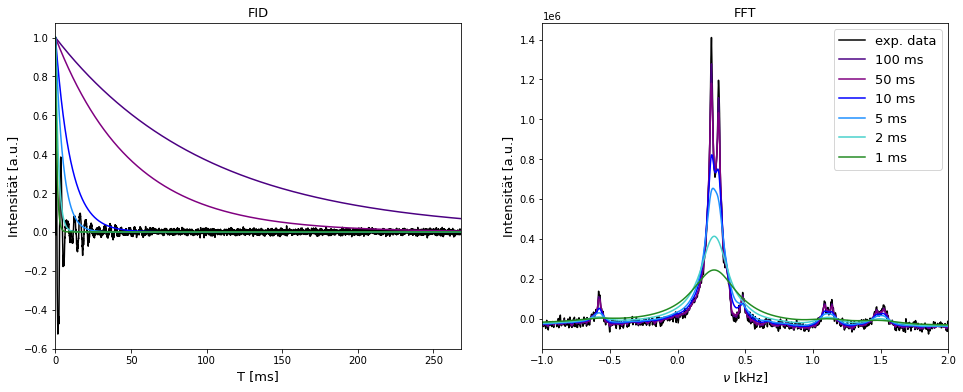

In [3]:
import warnings
warnings.filterwarnings("ignore")

T2       = [[],100,50,10,5,2,1]
colors   = ['black','indigo','purple','blue','dodgerblue','mediumturquoise','forestgreen']
leg_text = ['exp. data','100 ms','50 ms','10 ms','5 ms','2 ms','1 ms']

plt.figure(figsize=(16,6))

for k in range(len(T2)):

    # Matched Filter
    if k == 0:
        envelope = np.ones_like(fid)
    else:
        envelope = np.exp(-(t/T2[k]))
    
    # Multiplikation mit Filter
    currsig = fid*envelope
    currspc = fftshift(fft(currsig))

    # Plot
    plt.subplot(121)
    if k == 0:
        plt.plot(t,np.real(currsig)/np.amax(np.real(currsig)),color=colors[k])
    else:
        plt.plot(t,envelope,color=colors[k])
    plt.xlim((0,np.amax(t)))
    plt.xlabel('T [ms]',fontsize=13)
    plt.ylabel('Intensität [a.u.]',fontsize=13)
    plt.title('FID',fontsize=13)

    plt.subplot(122)
    plt.plot(frq,np.real(currspc),color=colors[k])
    plt.xlim((-1,2))
    plt.xlabel('$\\nu$ [kHz]',fontsize=13)
    plt.ylabel('Intensität [a.u.]',fontsize=13)
    plt.legend(leg_text,fontsize=13)
    plt.title('FFT',fontsize=13);

### 1c)
Finden Sie eine passende Zerfallszeit für den Matched Filter, sodass Sie eine gute Balance zwischen Auflösung und SNR erhalten.

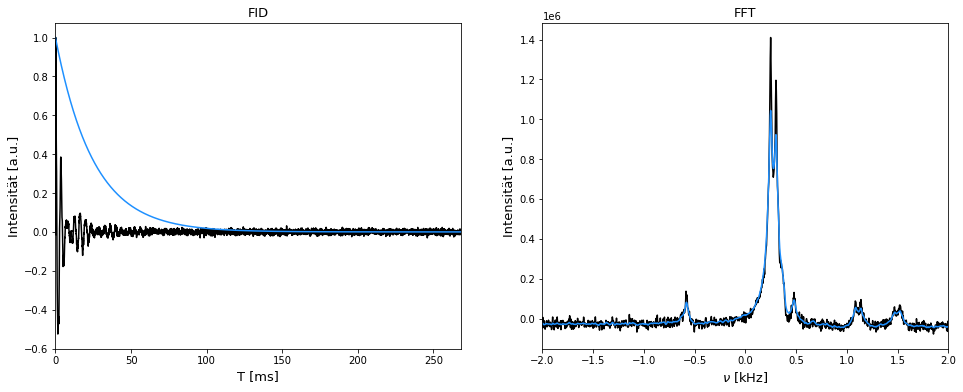

In [4]:
T2 = 25 #ms

envelope = np.exp(-(t/T2))
matchedsig = fid*envelope
matchedspc = fftshift(fft(matchedsig))

plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(t,np.real(fid)/np.amax(np.real(fid)),'k')
plt.plot(t,envelope,color='dodgerblue')
plt.xlim((0,np.amax(t)))
plt.xlabel('T [ms]',fontsize=13)
plt.ylabel('Intensität [a.u.]',fontsize=13)
plt.title('FID',fontsize=13)

plt.subplot(122)
plt.plot(frq,np.real(spc),'k')
plt.plot(frq,np.real(matchedspc),color='dodgerblue')
plt.xlim((-2,2))
plt.xlabel('$\\nu$ [kHz]',fontsize=13)
plt.ylabel('Intensität [a.u.]',fontsize=13)
plt.title('FFT',fontsize=13);

### 1d)
Nehmen Sie nun an die Aufnahmezeit des FID's ist beschränkt auf 20 ms. Erstellen Sie aus `fid.mat` das entsprechende abgeschnittene Signal, hängen Sie dann Nullen an (Zerofilling), sodass Sie am Ende ein Signal mit insgesamt 2048 Punkte erhalten. Was fällt Ihnen auf, wenn Sie die Spektren des abgeschnittenen und des originalen Signal mit dem vollständigen vergleichen? 

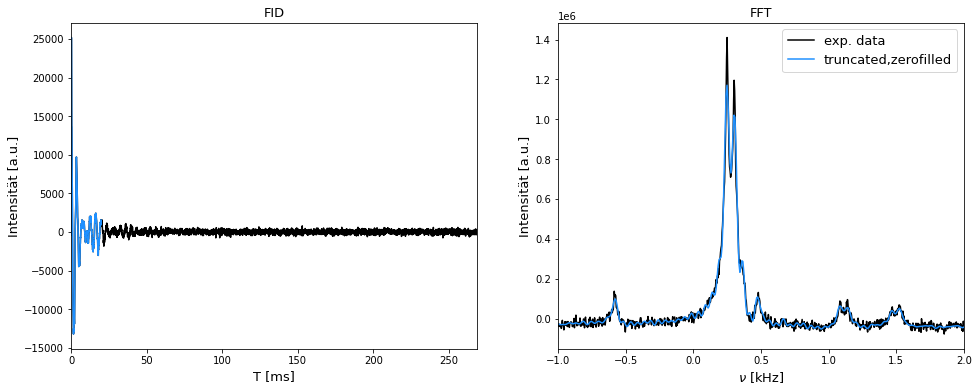

In [5]:
# Truncation
end    = 20 # ms
fidcut = fid[t<=end]
tcut   = t[t<=end]

# Zerofilling
Nzf   = 2048
zf    = Nzf-len(fidcut)
tzf   = t[0:Nzf]
fidzf = np.pad(fidcut,(0,zf))

# Spektrum
frqzf = fftshift(fftfreq(len(tzf),d=dt))
spczf = fftshift(fft(fidzf))

plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(t,np.real(fid),'k')
plt.plot(tcut,np.real(fidcut),color='dodgerblue')
plt.xlim((0,np.amax(t)))
plt.xlabel('T [ms]',fontsize=13)
plt.ylabel('Intensität [a.u.]',fontsize=13)
plt.title('FID',fontsize=13)

plt.subplot(122)
plt.plot(frq,np.real(spc),'k')
plt.plot(frqzf,np.real(spczf),color='dodgerblue')
plt.xlim((-1,2))
plt.xlabel('$\\nu$ [kHz]',fontsize=13)
plt.ylabel('Intensität [a.u.]',fontsize=13)
plt.title('FFT',fontsize=13)
plt.legend(['exp. data','truncated,zerofilled'],fontsize=13);


### 1e)
Programmieren Sie ein Hamming Apodisierungsfenster 

$$ w_{\text{hamming}}(t) = 0.54 + 0.46 \cos(\frac{\pi t}{t_{\text{max}}})$$

für das bei 60 ms abgeschnittene FID. Wenden Sie das Hamming Window auf das abgeschnittene Signal an, zerofillen Sie auf 2048 Punkte und vergleichen Sie die Spektren mit und ohne Hamming Window.

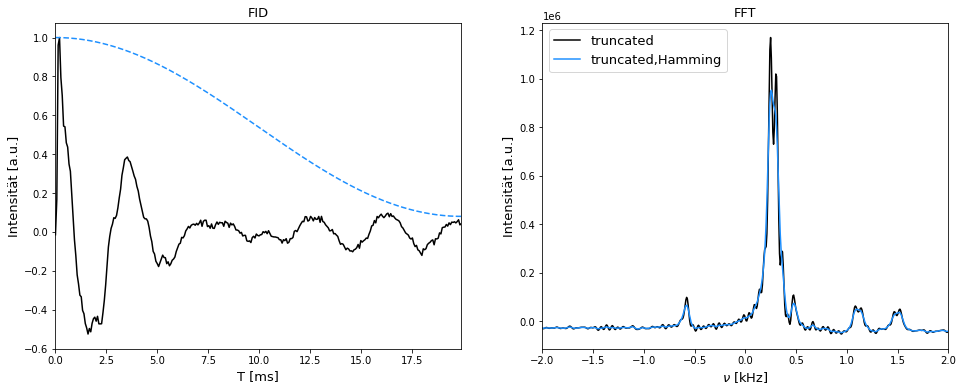

In [6]:
import math as m

tmax    = tcut[len(tcut)-1]
hamming = 0.54 + 0.46*np.cos(m.pi*tcut/tmax)

# Apodisierung
fidhamming = fidcut*hamming

# Spektrum
frqhamming = fftshift(fftfreq(Nzf,d=dt))
spchamming = fftshift(fft(fidhamming,Nzf))

# Plot
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(tcut,np.real(fidcut)/np.amax(np.real(fidcut)),color='black')
plt.plot(tcut,hamming,'--',color='dodgerblue')
plt.xlim((0,np.amax(tcut)))
plt.xlabel('T [ms]',fontsize=13)
plt.ylabel('Intensität [a.u.]',fontsize=13)
plt.title('FID',fontsize=13)

plt.subplot(122)
plt.plot(frqzf,np.real(spczf),color='black')
plt.plot(frqhamming,np.real(spchamming),color='dodgerblue')
plt.xlim((-2,2))
plt.xlabel('$\\nu$ [kHz]',fontsize=13)
plt.ylabel('Intensität [a.u.]',fontsize=13)
plt.legend(['truncated','truncated,Hamming'],fontsize=13)
plt.title('FFT',fontsize=13);

### 1f)
Zeigen Sie, dass ein Hamming Fenster die Auflösung im Frequenzbereich im Vergleich zu einem "hart" abgeschnittenen FID verschlechtert, jedoch die *ripples* besser unterdrückt. Verwenden Sie Zerofilling au 2048 Punkte. Vergleichen Sie dazu die entsprechende Faltungsfunktion im Frequenzbereich.

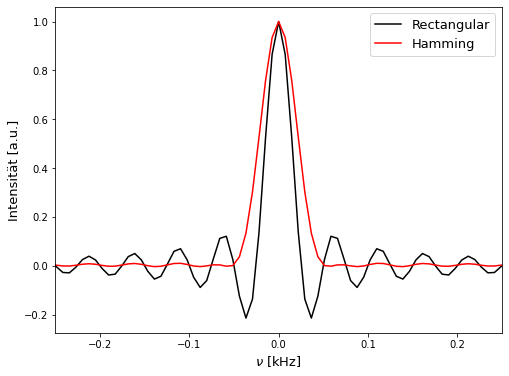

In [7]:
# Hamming Fenster
tmax    = tcut[len(tcut)-1]
hamming = 0.54 + 0.46*np.cos(m.pi*tcut/tmax)

# Rechteckiges Fenster
rect    = np.ones_like(tcut)

# Spektrum
spchamming = fftshift(fft(hamming,Nzf))
spcrect    = fftshift(fft(rect,Nzf))

plt.figure(figsize=[8,6])
plt.plot(frqzf,np.real(spcrect)/max(np.real(spcrect)),'k'); 
plt.plot(frqzf,np.real(spchamming)/max(np.real(spchamming)),'r')
plt.ylabel('Intensität [a.u.]',fontsize=13)
plt.xlabel('$\\nu$ [kHz]',fontsize=13)
plt.xlim([-0.25, 0.25])
plt.legend(['Rectangular','Hamming'],fontsize=13)

## Aufgabe 2: Digitalisierung eines Zeitsignals
---------
Ein zeitlich abfallendes oszillierendes Signal hat die Form:
$\begin{equation}
	x(t) = 
	\begin{cases}
		 \exp \left( - \frac{t}{T_2} \right) \left\{ \cos(2\pi \nu_1 t) + 3\cos(2\pi \nu_2 t) \right\} & t\geq 0 \\
	 	0 & t < 0
	 \end{cases}
\end{equation}$
mit den beiden Frequenzkomponenten $ \nu_1 =10\,{\rm Hz}$ und $\nu_2 = 150\,{\rm Hz}$ sowie der Zerfallszeit $T_2  = 0.5\,{\rm s}$. Das Signal wird total durch 2048 Punkte aufgenommen und digitalisiert.

---------

### 2a)
Welche Abtastrate schlagen Sie für das Digitalisieren dieses Signals vor? Begründen Sie Ihre Antwort mit Hilfe des Abtasttheorems.
Berechnen Sie anhand der vorgeschlagenen Abtastrate das Zeitsignal und das dazugehörige Spektrum.


<u>Lösung:</u>

Das Nyquist-Theorem besagt, dass die Abtastrate mehr als zwei mal so gross wie die höchste Frequenzkomponente des zu abtastenden Signals. Die höchste Frequenzkomponente des Zeitsignals is $\nu_2 =  150\,{\rm Hz}$, was bedeutet:
$$ f_s > 300\,{\rm Hz} $$
Der exponentielle Zerfall mit der Zerfallzeit $T_2 = 0.5\,{\rm s}$ führt allerdings zusätzlich zu einer Linienverbreiterung von $2\,{\rm Hz}$. Für die korrekte Abtastrate muss das auch miteinberechnet werden und wir verwenden:
$$ f_s > 2 (150 + 5\cdot 2)\,{\rm Hz} = 320\,{\rm Hz}$$

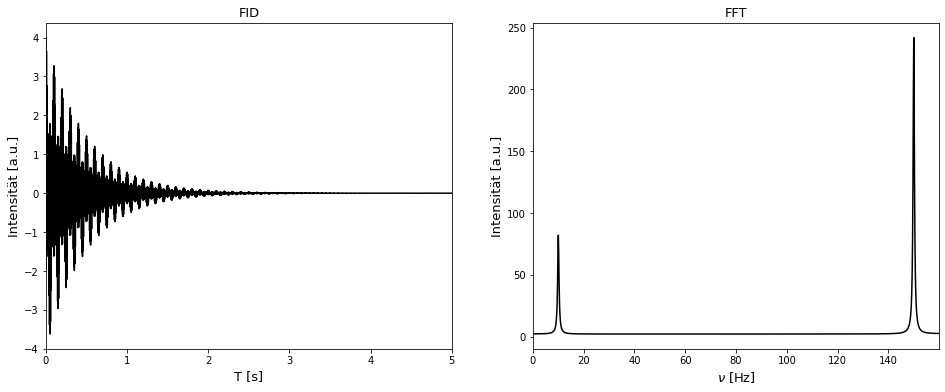

In [8]:
# Parameter
nu1 = 10
nu2 = 150
T2  = 0.5

# Abtastrate
fs   = 320
dt   = 1/fs

# Zeitachse und Signal
N      = 2048
t      = np.linspace(0,(N-1)*dt,N)
signal = (np.cos(2*m.pi*nu1*t)+3*np.cos(2*m.pi*nu2*t))*np.exp(-t/T2)

# Frequenzachse und Spektrum
frq = fftshift(fftfreq(N,d=dt))
spc = fftshift(fft(signal))

# Plot
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(t,np.real(signal),color='black')
plt.xlim((0,5))
plt.xlabel('T [s]',fontsize=13)
plt.ylabel('Intensität [a.u.]',fontsize=13)
plt.title('FID',fontsize=13)

plt.subplot(122)
plt.plot(frq,np.real(spc),color='black')
plt.xlim((0,np.amax(frq)))
plt.xlabel('$\\nu$ [Hz]',fontsize=13)
plt.ylabel('Intensität [a.u.]',fontsize=13)
plt.title('FFT',fontsize=13);

### 2b)
Vergleichen Sie unterschiedlichen Abtastraten $f_s = 200,250,320,1000\,{\rm Hz}$ für das obengenannte Signal . Was für Erkenntnisse können Sie aus den entsprechenden Spektren gewinnen?

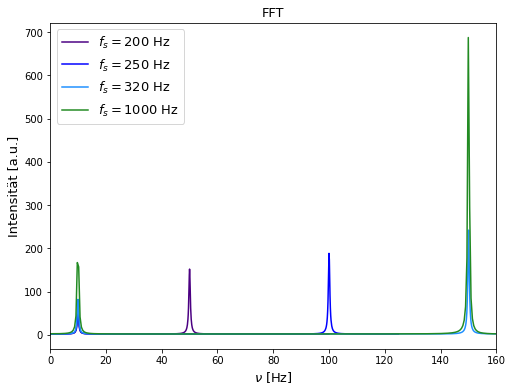

In [14]:
# Parameter
nu1 = 10
nu2 = 150
T2  = 0.5

# Abtastrate
fs   = [200,250,320,1000]

# Plot-Parameter
plt.figure(figsize=(8,6))
color = ['indigo','blue','dodgerblue','forestgreen']
legtex= ['$f_s = 200$ Hz','$f_s = 250$ Hz','$f_s = 320$ Hz','$f_s = 1000$ Hz']

for k in range(len(fs)):
    dt   = 1/fs[k]

    # Zeitachse und Signal
    N      = 2048
    t      = np.linspace(0,(N-1)*dt,N)
    signal = (np.cos(2*m.pi*nu1*t)+3*np.cos(2*m.pi*nu2*t))*np.exp(-t/T2)

    # Frequenzachse und Spektrum
    frq = fftshift(fftfreq(N,d=dt))
    spc = fftshift(fft(signal))

    # Plot
    plt.plot(frq,np.real(spc),color=color[k])
    plt.xlim((0,160))
    plt.xlabel('$\\nu$ [Hz]',fontsize=13)
    plt.ylabel('Intensität [a.u.]',fontsize=13)
    plt.legend(legtex,fontsize=13)
    plt.title('FFT',fontsize=13);